<a href="https://colab.research.google.com/github/David-Castanheira/analise-covid19-eua/blob/main/analise_dados_covid19_eua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Ignora avisos para manter a visualização organizada
warnings.filterwarnings("ignore")
# Carrega o dataset
df = pd.read_csv('covid19-eua.csv')

In [4]:
# Lê os registros do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         15633 non-null  int64  
 1   state                        15633 non-null  object 
 2   positive                     15481 non-null  float64
 3   probableCases                5449 non-null   float64
 4   negative                     15323 non-null  float64
 5   pending                      1684 non-null   float64
 6   totalTestResultsSource       15633 non-null  object 
 7   totalTestResults             15598 non-null  float64
 8   hospitalizedCurrently        12516 non-null  float64
 9   hospitalizedCumulative       9434 non-null   float64
 10  inIcuCurrently               7713 non-null   float64
 11  inIcuCumulative              2700 non-null   float64
 12  onVentilatorCurrently        6211 non-null   float64
 13  onVentilatorCumu

In [5]:
# Retorna uma tupla com a dimensão do dataframe
df.shape

(15633, 55)

In [6]:
# Retorna as colunas do dataframe
df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [7]:
# Verifica as colunas com valores nulos
df.isnull().sum()

,0
date,0
state,0
positive,152
probableCases,10184
negative,310
pending,13949
totalTestResultsSource,0
totalTestResults,35
hospitalizedCurrently,3117
hospitalizedCumulative,6199


In [8]:
# Exibe as primeiras linhas do dataset
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [9]:
# Exibe as últimas linhas do dataset
df.tail()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
15628,20200124,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,82726df68eb97c98a4a6ee792349e547023147d5,0,0,0,0,0,NaN
15629,20200123,MA,NaN,NaN,NaN,NaN,totalTestsViral,2.0,NaN,NaN,...,0,0,0,76bc987d054b119a4e05a4a43742249c0b0568b6,0,0,0,0,0,NaN
15630,20200123,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,1c2229c239ffad5e5fdd9d76c641dc9166caf6ba,0,0,0,0,0,NaN
15631,20200122,MA,NaN,NaN,NaN,NaN,totalTestsViral,1.0,NaN,NaN,...,0,0,0,01f5dcd6631859503ef1b62d81d49e41d12fc1bd,0,0,0,0,0,NaN
15632,20200122,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,4502685e582e68071bfe8f7e1b307bc09c16728d,0,0,0,0,0,NaN


In [10]:
# Imprime o dataset para visualização via terminal
print(df)

           date state  positive  probableCases   negative  pending  \
0      20201206    AK   35720.0            NaN  1042056.0      NaN   
1      20201206    AL  269877.0        45962.0  1421126.0      NaN   
2      20201206    AR  170924.0        22753.0  1614979.0      NaN   
3      20201206    AS       0.0            NaN     2140.0      NaN   
4      20201206    AZ  364276.0        12590.0  2018813.0      NaN   
...         ...   ...       ...            ...        ...      ...   
15628  20200124    WA       0.0            NaN        0.0      NaN   
15629  20200123    MA       NaN            NaN        NaN      NaN   
15630  20200123    WA       0.0            NaN        0.0      NaN   
15631  20200122    MA       NaN            NaN        NaN      NaN   
15632  20200122    WA       0.0            NaN        0.0      NaN   

         totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0               totalTestsViral         1077776.0                  164.0   
1      

In [14]:
# Retorna as estatísticas como desvio padrão, moda, mediana do dataframe
df.describe()

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,Total Test Results Source
count,1.563300e+04,1.548100e+04,5449.000000,1.532300e+04,1684.000000,1.559800e+04,12516.000000,9434.000000,7713.000000,2700.000000,...,1.563300e+04,15633.000000,15633.000000,15633.0,15633.0,15633.0,15633.0,15633.0,0.0,15633
mean,2.020073e+07,8.192476e+04,5132.611488,9.830243e+05,1492.718527,1.159400e+06,942.667705,8156.948590,305.377026,1368.261852,...,1.044659e+06,17.486983,37.463827,0.0,0.0,0.0,0.0,0.0,NaN,1970-01-01 00:00:00.020200727
min,2.020012e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN,1970-01-01 00:00:00.020200122
25%,2.020051e+07,2.817000e+03,464.000000,5.044200e+04,29.000000,5.151775e+04,135.000000,680.250000,59.000000,363.750000,...,4.737700e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,1970-01-01 00:00:00.020200511
50%,2.020072e+07,2.313400e+04,2108.000000,2.951530e+05,195.000000,3.532310e+05,464.000000,3016.500000,148.000000,990.000000,...,3.095820e+05,4.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,1970-01-01 00:00:00.020200720
75%,2.020093e+07,9.694200e+04,6259.000000,9.829570e+05,991.000000,1.192387e+06,1013.000000,9338.750000,315.000000,1849.750000,...,1.056107e+06,17.000000,31.000000,0.0,0.0,0.0,0.0,0.0,NaN,1970-01-01 00:00:00.020200928
max,2.020121e+07,1.341700e+06,100964.000000,2.385335e+07,64400.000000,2.519505e+07,18825.000000,89995.000000,5225.000000,6676.000000,...,2.519505e+07,951.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN,1970-01-01 00:00:00.020201206
std,2.653114e+02,1.498767e+05,8372.729572,2.094830e+06,5032.866393,2.326293e+06,1585.640390,15230.676264,502.551557,1325.765418,...,2.209745e+06,43.364168,230.386136,0.0,0.0,0.0,0.0,0.0,NaN,NaN


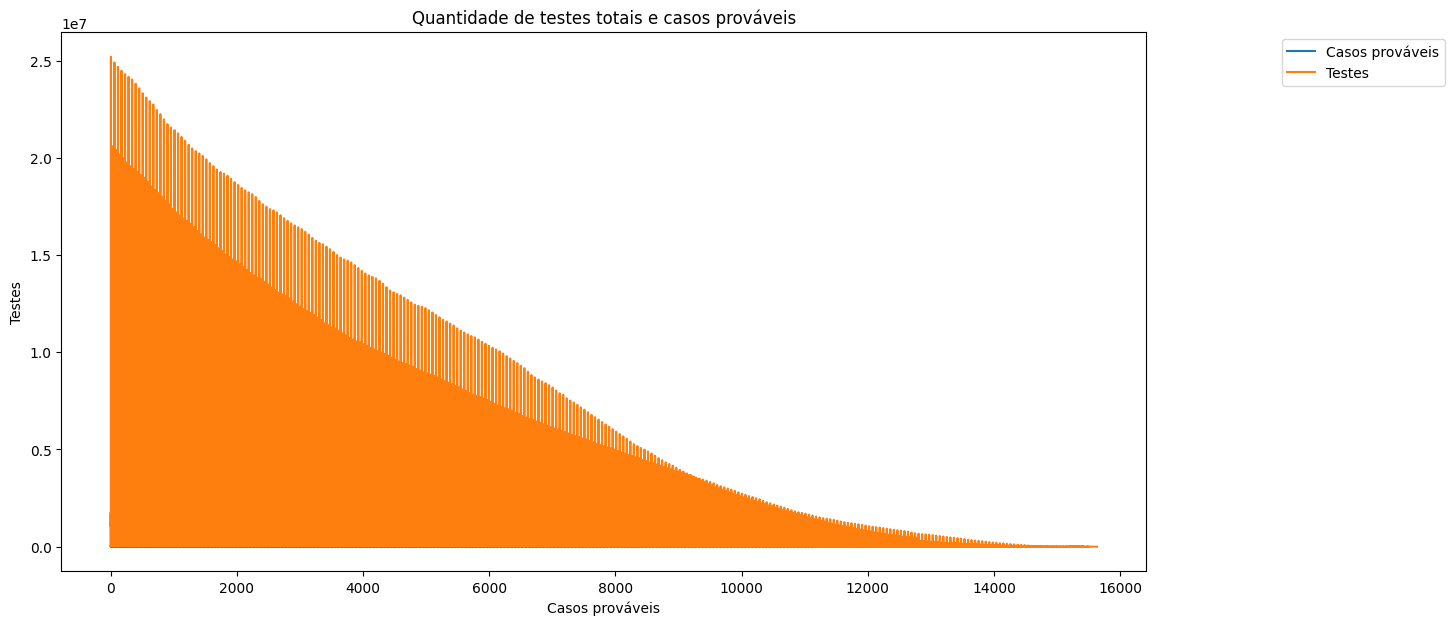

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(df[['probableCases', 'totalTestResults']])
plt.title("Quantidade de testes totais e casos prováveis")
plt.xlabel("Casos prováveis")
plt.ylabel("Testes")
plt.legend(['Casos prováveis','Testes'], #Define os rótulos que serão exibidos na legenda
           loc='upper center', #Define a posição da legenda no gráfico(centro superior)
           bbox_to_anchor=(1.2,1)) #indica que a legenda será posicionada fora do gráfico(X, Y)
plt.show()